In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

# Importação dos dados

Base de dados com histórico de preços da ação da Google foi retirada do kaggle, instalada localmente e movida para uma pasta no google drive, para assim ser acessada no colab.

Fonte: https://www.kaggle.com/datasets/tanyildizderya/google-price-data-set/data  

In [3]:
# Conectar ao google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
os.listdir('/content/drive/MyDrive/5) Recurrent Neural Network')

['Recurrent Neural Network (RNN).ipynb',
 'new world image.jpg',
 'temporal loop.jpg',
 'Stock_Price_Train.csv',
 'many to one.jpg',
 'one to many.jpg',
 'Stock_Price_Test.csv',
 'international-airline-passengers.csv',
 'many to many.jpg',
 'lstm.jpg',
 '.ipynb_checkpoints',
 'Recurrent_Neural_Networks']

In [9]:
train_data = pd.read_csv('/content/drive/MyDrive/5) Recurrent Neural Network/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')

In [10]:
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Aqui é possível ver as colunas que existem no dataset.
1. Date: Data do dia em que as informações dizem respeito.
2. Open: Preço em que a ação estava na abertura da bolsa no dia.
3. High: Preço mais alto que a ação atingiu no dia.
4. Low: Preço mais baixo que a ação atingiu no dia.
5. Close: Preço em que a ação estava no fechamento da bolsa no dia.
6. Volume: Quantidade de ações deste ativo movimentadas no dia.

In [12]:
train = train_data.loc[:,['Open']].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# PréProcessamento
Normalização dos dados

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

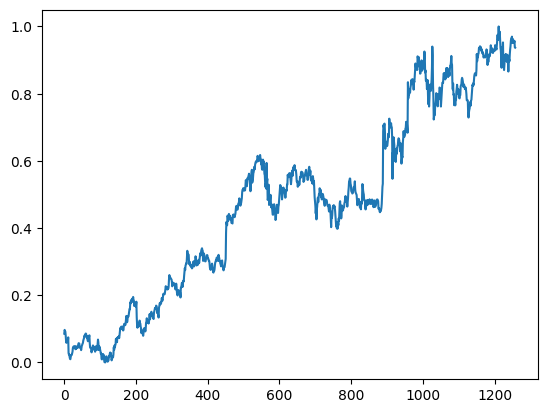

In [14]:
plt.plot(train_scaled)

In [16]:
# Criação de uma estrutura de dados com 50 timesteps e 1 output

X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train, y_train

(array([[[0.08581368],
         [0.09701243],
         [0.09433366],
         ...,
         [0.03675869],
         [0.04486941],
         [0.05065481]],
 
        [[0.09701243],
         [0.09433366],
         [0.09156187],
         ...,
         [0.04486941],
         [0.05065481],
         [0.05214302]],
 
        [[0.09433366],
         [0.09156187],
         [0.07984225],
         ...,
         [0.05065481],
         [0.05214302],
         [0.05612397]],
 
        ...,
 
        [[0.9313937 ],
         [0.94636878],
         [0.96569685],
         ...,
         [0.95475854],
         [0.95204256],
         [0.95163331]],
 
        [[0.94636878],
         [0.96569685],
         [0.97510976],
         ...,
         [0.95204256],
         [0.95163331],
         [0.95725128]],
 
        [[0.96569685],
         [0.97510976],
         [0.95966962],
         ...,
         [0.95163331],
         [0.95725128],
         [0.93796041]]]),
 array([0.05214302, 0.05612397, 0.05818885, ..., 0.9572

In [20]:
test_data = pd.read_csv('/content/drive/MyDrive/5) Recurrent Neural Network/Stock_Price_Test.csv')
test_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [21]:
real_stock_price = test_data.loc[:,['Open']].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [22]:
total_data = pd.concat((train_data['Open'],test_data['Open']),axis=0)
inputs = total_data[len(total_data)-len(test_data)-timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

# Criação e treinamento do modelo RNN

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.4513
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.2527
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.1703
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.1601
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.1141
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0906
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0691
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0646
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0516
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0559
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0441
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0347
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0285
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0303
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - lo

# Teste do modelo e visualização dos resultados

In [23]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


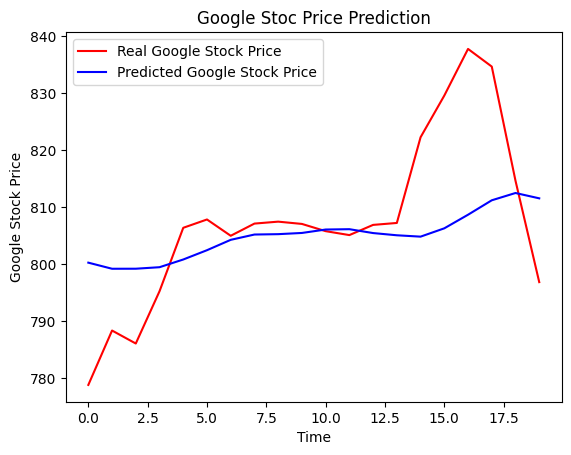

In [24]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stoc Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Métricas complementares

Por se tratar de um problema de regressão onde os valores reais e preditos estão em um espaço contínuo, não binário como em problemas de classificação, foram escolhidas como métricas complementares o MSE (Erro Quadrático Médio), MAE (Erro Absoluto Médio) e R² (Coeficiente de Determinação).

1. MSE: Representa o quadrado da diferença entre o valor previsto e o real, sendo útil para destacar grandes desvios nas previsões.
2. MAE: Mede a diferença média entre os valores reais e previstos, tratando todos os erros de forma linear.
3. R²: Indica o quanto da variação nos dados reais é aprendida pelo modelo, variando de 0 a 1. Um valor mais próximo de 1 significa que o modelo aprendeu bem a variação dos preços presente no dataset, sendo uma boa medida da qualidade do modelo, enquanto que um valor mais próximo de 0 significa que o modelo não conseguiu capturar corretamente a variação presente.

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Função para calcular as métricas de regressão
def calculate_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Cálculo das métricas
mse, mae, r2 = calculate_regression_metrics(real_stock_price, predicted_stock_price)
print(f'MSE (Erro Quadrático Médio): {mse}')
print(f'MAE (Erro Absoluto Médio): {mae}')
print(f'R²: {r2}')

MSE (Erro Quadrático Médio): 165.82769942856743
MAE (Erro Absoluto Médio): 9.10968713378906
R²: 0.237011302923269
